## Model Training

#### Import Data and Required Packages

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Modelling
from sklearn.metrics import f1_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier

import warnings

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/drug_data.csv')

#### Show Top 5 Records

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.shape

(200, 6)

#### Preparing X and Y variables

In [5]:
X = df.drop(columns=['Drug'],axis=1)

In [6]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [7]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

See unique values in categorical variables

In [8]:
print("Categories in 'Sex' variable:     ",end=" " )
print(df['Sex'].unique())
print("Categories in 'BP' variable:     ", end=" " )
print(df['BP'].unique())
print("Categories in 'Cholesterol' variable:     ",end=" " )
print(df['Cholesterol'].unique())
print("Categories in 'Drug' variable:     ", end=" " )
print(df['Drug'].unique())

Categories in 'Sex' variable:      ['F' 'M']
Categories in 'BP' variable:      ['HIGH' 'LOW' 'NORMAL']
Categories in 'Cholesterol' variable:      ['HIGH' 'NORMAL']
Categories in 'Drug' variable:      ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [9]:
y = df['Drug']

In [10]:
y

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

#### Transform all variables

In [11]:
# Create Column Transformer with 3 types of transformers
cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

print("Numerical Features: ", num_features)
print("Categorical Features: ", cat_features)

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),        
    ]
)

Numerical Features:  ['Age', 'Na_to_K']
Categorical Features:  ['Sex', 'BP', 'Cholesterol']


In [12]:
X = preprocessor.fit_transform(X)

In [13]:
X.shape

(200, 9)

In [14]:
X[0,:]

array([ 1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        1.        ,  0.        , -1.29159102,  1.28652212])

#### Split into train and test data

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape

((160, 9), (40, 9))

#### Encode target variable too

In [16]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)  


#### Handle class imbalancement

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

#### Create an Evaluate Function to give all metrics after model Training

In [18]:
def evaluate_model(true, predicted):
    conf_matrix = confusion_matrix(true, predicted)
    cl_report = classification_report(true, predicted, zero_division=1)
    f1 = f1_score(true, predicted, average='weighted', zero_division=1)
    return f1, conf_matrix, cl_report

Logistic Regression
Model performance for Training set:
- F1-Score: 98.76
- Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        74
           1       1.00      1.00      1.00        19
           2       0.93      1.00      0.97        14
           3       0.92      1.00      0.96        12
           4       1.00      1.00      1.00        41

    accuracy                           0.99       160
   macro avg       0.97      0.99      0.98       160
weighted avg       0.99      0.99      0.99       160

- Confusion Matrix:
 [[72  0  1  1  0]
 [ 0 19  0  0  0]
 [ 0  0 14  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 41]]


Model performance for Test set:
- F1-Score: 97.49
- Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
    

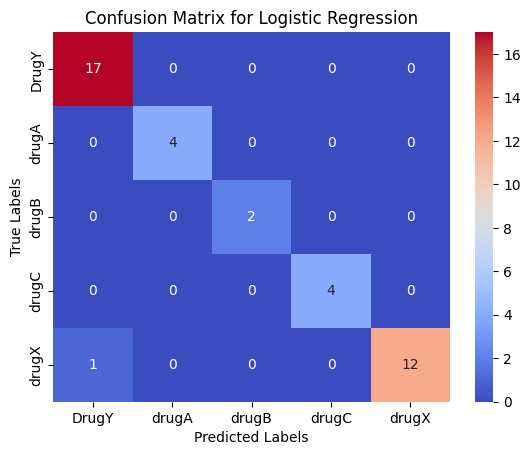



K-Neighbors Classifier
Model performance for Training set:
- F1-Score: 89.35
- Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89        74
           1       0.90      0.95      0.92        19
           2       0.86      0.86      0.86        14
           3       0.85      0.92      0.88        12
           4       0.83      0.98      0.90        41

    accuracy                           0.89       160
   macro avg       0.88      0.91      0.89       160
weighted avg       0.90      0.89      0.89       160

- Confusion Matrix:
 [[62  1  2  2  7]
 [ 1 18  0  0  0]
 [ 1  1 12  0  0]
 [ 0  0  0 11  1]
 [ 1  0  0  0 40]]


Model performance for Test set:
- F1-Score: 82.73
- Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.60      0.75      0.67         4
           2       0.50      0.50      0.50         2

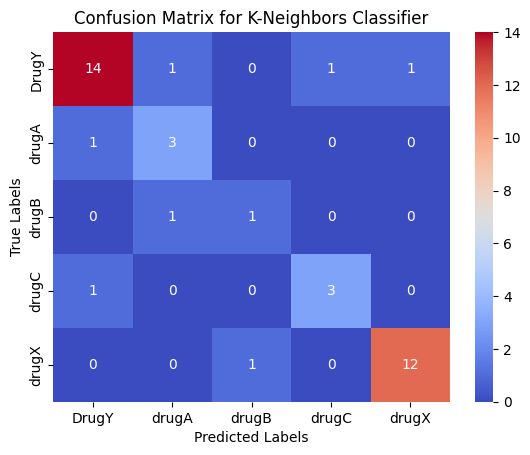



Decision Tree Classifier
Model performance for Training set:
- F1-Score: 100.00
- Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        41

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160

- Confusion Matrix:
 [[74  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  0 14  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 41]]


Model performance for Test set:
- F1-Score: 100.00
- Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00      

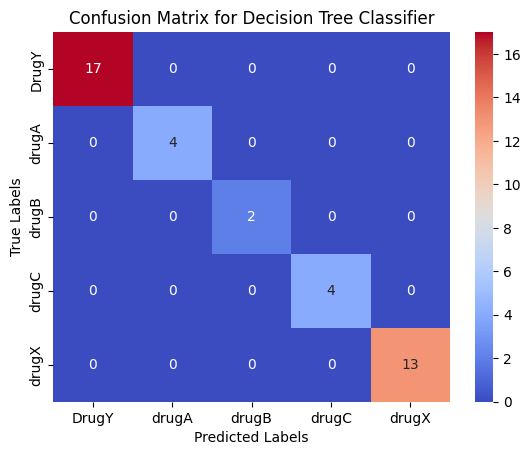



Random Forest Classifier
Model performance for Training set:
- F1-Score: 100.00
- Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        41

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160

- Confusion Matrix:
 [[74  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  0 14  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 41]]


Model performance for Test set:
- F1-Score: 100.00
- Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00      

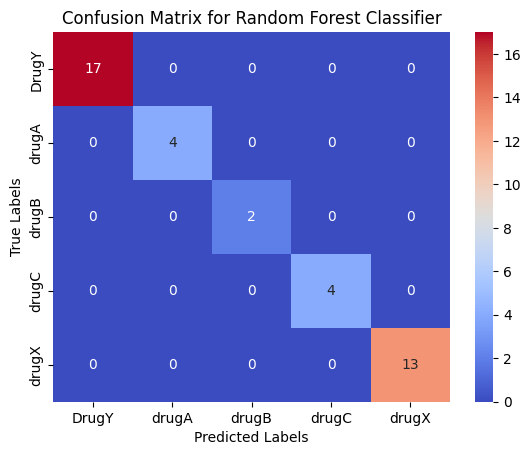



XGBoost Classifier
Model performance for Training set:
- F1-Score: 100.00
- Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        41

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160

- Confusion Matrix:
 [[74  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  0 14  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 41]]


Model performance for Test set:
- F1-Score: 97.60
- Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
  

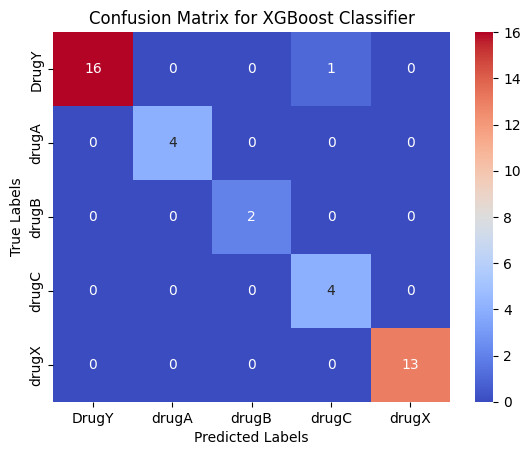



AdaBoost Classifier
Model performance for Training set:
- F1-Score: 77.28
- Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       0.58      1.00      0.73        19
           2       1.00      0.00      0.00        14
           3       1.00      0.00      0.00        12
           4       0.77      1.00      0.87        41

    accuracy                           0.84       160
   macro avg       0.87      0.60      0.52       160
weighted avg       0.89      0.84      0.77       160

- Confusion Matrix:
 [[74  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0 14  0  0  0]
 [ 0  0  0  0 12]
 [ 0  0  0  0 41]]


Model performance for Test set:
- F1-Score: 78.67
- Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.67      1.00      0.80         4
           2       1.00      0.00      0.00         2
  

e:\Self_L\End-to-End_Diabetes\venv_dbts\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


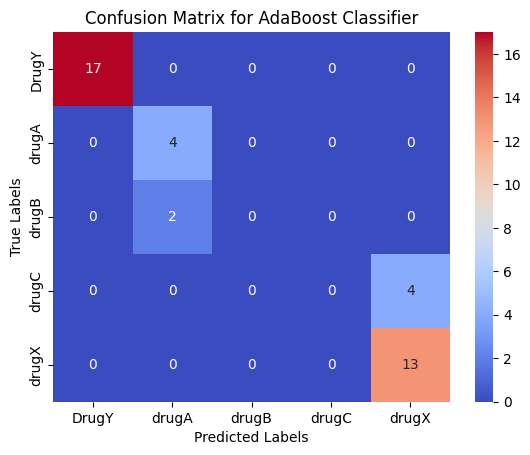



Gradient Boosting Classifier
Model performance for Training set:
- F1-Score: 100.00
- Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        41

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160

- Confusion Matrix:
 [[74  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  0 14  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 41]]


Model performance for Test set:
- F1-Score: 100.00
- Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00  

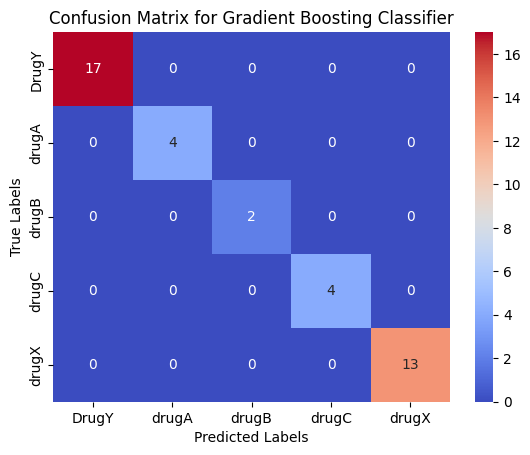



Support Vector Classifier (SVC)
Model performance for Training set:
- F1-Score: 98.16
- Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        74
           1       1.00      1.00      1.00        19
           2       0.93      1.00      0.97        14
           3       0.86      1.00      0.92        12
           4       1.00      1.00      1.00        41

    accuracy                           0.98       160
   macro avg       0.96      0.99      0.97       160
weighted avg       0.98      0.98      0.98       160

- Confusion Matrix:
 [[71  0  1  2  0]
 [ 0 19  0  0  0]
 [ 0  0 14  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 41]]


Model performance for Test set:
- F1-Score: 92.48
- Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.75      0.86         4
           2       0.67      1.00      0.80 

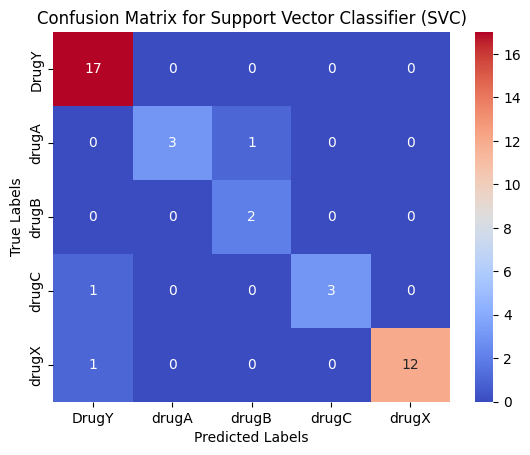



Naive Bayes Classifier
Model performance for Training set:
- F1-Score: 68.07
- Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.38      0.55        74
           1       0.54      1.00      0.70        19
           2       0.64      1.00      0.78        14
           3       0.60      1.00      0.75        12
           4       0.75      1.00      0.85        41

    accuracy                           0.71       160
   macro avg       0.70      0.88      0.73       160
weighted avg       0.82      0.71      0.68       160

- Confusion Matrix:
 [[28 16  8  8 14]
 [ 0 19  0  0  0]
 [ 0  0 14  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 41]]


Model performance for Test set:
- F1-Score: 65.82
- Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.29      0.45        17
           1       0.50      1.00      0.67         4
           2       1.00      1.00      1.00         2

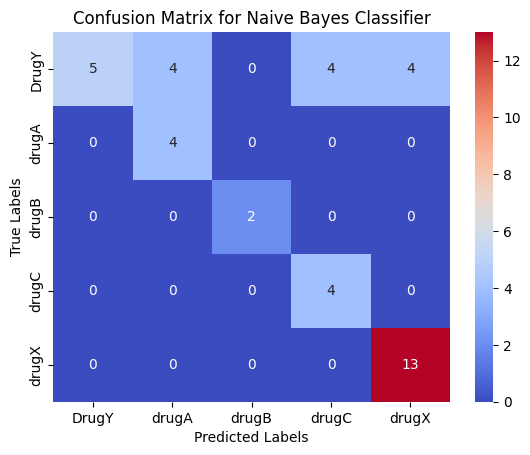



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 107
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 9
[LightGBM] [Info] Start training from score -0.771109
[LightGBM] [Info] Start training from score -2.130735
[LightGBM] [Info] Start training from score -2.436116
[LightGBM] [Info] Start training from score -2.590267
[LightGBM] [Info] Start training from score -1.361602
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

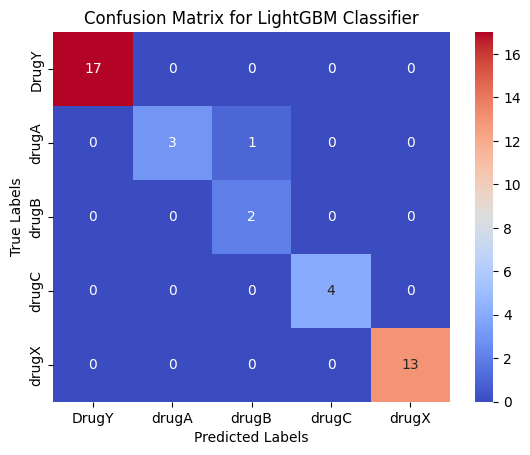



Bagging Classifier
Model performance for Training set:
- F1-Score: 100.00
- Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        41

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160

- Confusion Matrix:
 [[74  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  0 14  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 41]]


Model performance for Test set:
- F1-Score: 100.00
- Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
 

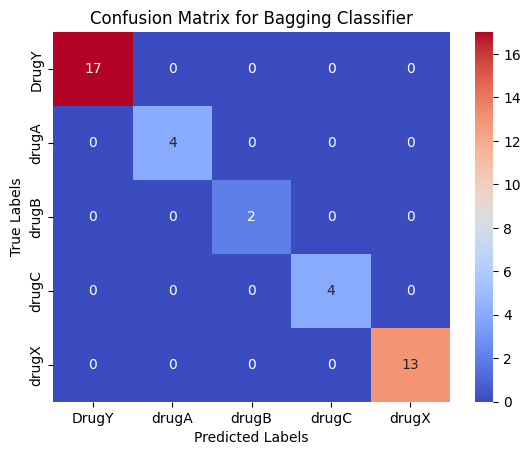

In [19]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBoost Classifier": XGBClassifier(), 
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Support Vector Classifier (SVC)": SVC(),
    "Naive Bayes Classifier": GaussianNB(),
    "LightGBM Classifier": LGBMClassifier(),
    #"CatBoost Classifier": CatBoostClassifier(verbose=False),
    "Bagging Classifier": BaggingClassifier()
}

# Lists to store results
model_list = []
f1_score_list = []

# Iterate over models
for i in range(len(list(models))):

    model_name = list(models.keys())[i]
    model = list(models.values())[i]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate the model
    train_f1, train_conf_matrix, train_cl_report = evaluate_model(y_train, y_train_pred)
    test_f1, test_conf_matrix, test_cl_report = evaluate_model(y_test, y_test_pred)
    
    # Append model name and accuracy to lists
    model_list.append(model_name)
    f1_score_list.append(test_f1)

    # Print results
    print(model_name)
    print('Model performance for Training set:')
    print("- F1-Score: {:.2f}".format(train_f1 * 100))
    print("- Classification Report:\n", train_cl_report)
    print("- Confusion Matrix:\n", train_conf_matrix)
    print('\n')    
    print('Model performance for Test set:')
    print("- F1-Score: {:.2f}".format(test_f1 * 100))
    print("- Classification Report:\n", test_cl_report)
    plt.figure()  
    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='coolwarm', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()    
    print('='*35)
    print('\n')

### Results

In [20]:
pd.DataFrame(list(zip(model_list, f1_score_list)), columns=['Model Name', 'f1_score']).sort_values(by=["f1_score"], ascending=False)

,Model Name,f1_score
2,Decision Tree Classifier,1.000000
6,Gradient Boosting Classifier,1.000000
3,Random Forest Classifier,1.000000
10,Bagging Classifier,1.000000
4,XGBoost Classifier,0.976010
9,LightGBM Classifier,0.975714
0,Logistic Regression,0.974857
7,Support Vector Classifier (SVC),0.924817
1,K-Neighbors Classifier,0.827273
5,AdaBoost Classifier,0.786667
